### 背景
随着智能电表的兴起以及诸如太阳能电池板之类的发电技术的广泛采用，可以提供大量的用电量数据。

该数据表示与电力相关的变量的多元时间序列，进而可以用于建模甚至预测未来的用电量。

### 家庭用电数据集
该家庭用电数据集是一个多元时间序列数据集描述的用电量为一户家庭超过四年。

该数据是在2006年12月至2010年11月之间收集的，每分钟收集一次家庭内部功耗的观察值。

它是一个由七个变量（日期和时间除外）组成的多变量系列；他们是：

- global_active_power：家庭消耗的总有功功率（千瓦）。
- global_reactive_power：家庭消耗的总无功功率（千瓦）。
- Voltage：平均电压（伏）。
- global_intensity：平均电流强度（安培）。
- sub_metering_1：厨房的有功电能（瓦特·小时有功电能）。
- sub_metering_2：洗衣房的有功电能（瓦特·小时有功电能）。
- sub_metering_3：气候控制系统的有功电能（有功电能的瓦时）。


### 加载数据集
可以从UCI机器学习存储库以单个20 MB的.zip文件下载数据集：

Household_power_consumption.zip

下载数据集并将其解压缩到当前工作目录中。现在，您将拥有文件“Household_power_consumption.txt ”，该文件大小约为127 MB，其中包含所有观察结果

检查数据文件。

以下是原始数据文件中的前五行数据（和标题）。

Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
16/12/2006;17:24:00;4.216;0.418;234.840;18.400;0.000;1.000;17.000
16/12/2006;17:25:00;5.360;0.436;233.630;23.000;0.000;1.000;16.000
16/12/2006;17:26:00;5.374;0.498;233.290;23.000;0.000;2.000;17.000
16/12/2006;17:27:00;5.388;0.502;233.740;23.000;0.000;1.000;17.000
16/12/2006;17:28:00;3.666;0.528;235.680;15.800;0.000;1.000;17.000

我们可以看到数据列之间用分号（' ; '）分隔。

据报告该时间段内每天的数据都有一行。

数据确实缺少值；例如，在2007年4月28日前后，我们可以看到2-3天的丢失数据值。

...   
28/4/2007;00:20:00;0.492;0.208;236.240;2.200;0.000;0.000;0.000   
28/4/2007;00:21:00;?;?;?;?;?;?;   
28/4/2007;00:22:00;?;?;?;?;?;?;   
28/4/2007;00:23:00;?;?;?;?;?;?;   
28/4/2007;00:24:00;?;?;?;?;?;?;   
...   

我们可以通过将数据文件作为Pandas DataFrame加载并总结加载的数据来开始。

我们可以使用read_csv（）函数加载数据。

使用此函数可以很容易地加载数据，但是正确地加载它有些棘手。

具体来说，我们需要做一些自定义的事情：

- 将列之间的分隔符指定为分号（sep =';'）   
- 指定第0行具有列的名称（header = 0）   
- 指定我们有很多RAM，以避免由于'？'而将数据加载为对象数组而不是数字数组的警告。缺失数据的值（low_memory = False）。   
- 指定在解析日期时熊猫可以尝试推断日期时间格式，这样更快（infer_datetime_format = True）   
- 指定我们希望将日期和时间列一起解析为一个名为“ datetime”的新列（parse_dates = {'datetime'：[0,1]}）   
- 指定我们希望新的“ datetime”列成为DataFrame的索引（index_col = ['datetime']）。   

综合所有这些，我们现在可以加载数据并总结加载的形状和前几行。   

In [2]:
# inline plot
%matplotlib inline

In [3]:
# load and clean-up data
from numpy import nan
from pandas import read_csv ##> https://pandas.pydata.org
# load all data
dataset = read_csv('../input/household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# summarize
print(dataset.shape)
print(dataset.head())

(2075259, 7)
                    Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15.800          0.

In [4]:
# mark all missing values
dataset.replace('?', nan, inplace=True)
# add a column for for the remainder of sub metering
values = dataset.values.astype('float32')
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])
# save updated dataset
dataset.to_csv('household_power_consumption.csv')
# load the new dataset and summarize
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
print(dataset.head())

                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

### 数据特征的观察

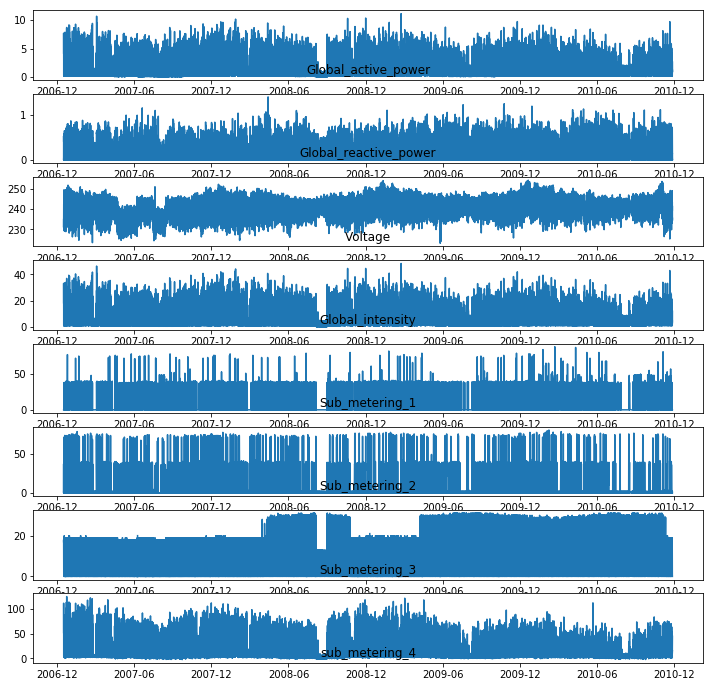

In [5]:
# line plots
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# line plot for each variable
pyplot.figure(figsize=(12, 12))
for i in range(len(dataset.columns)):
	pyplot.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	pyplot.plot(dataset[name])
	pyplot.title(name, y=0)
pyplot.show()

我们可以在“ Global_active_power ”和其他一些变量中看到季节性变化的影响。
"Sub_metering_1"(厨房) "Sub_metering_2"(洗衣间)有一些尖刺可能与特定时段（例如周末）匹配。

让我们放大并专注于“ Global_active_power ”（简称为“ 有功功率 ”）。

我们可以为每年创建一个新的有功功率图，以查看这些年中是否存在任何常见的模式。2006年是第一年，只有不到一个月的数据，因此将其从地块中删除。

In [6]:
# yearly line plots
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])

dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [7]:
dataset[str('2007')]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2007-01-01 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,43.000000
2007-01-01 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,42.533333
2007-01-01 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,42.500000
2007-01-01 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,42.500000
2007-01-01 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,42.566666
2007-01-01 00:05:00,2.550,0.100,241.83,10.4,0.0,0.0,0.0,42.500000
2007-01-01 00:06:00,2.534,0.096,241.07,10.4,0.0,0.0,0.0,42.233334
2007-01-01 00:07:00,2.484,0.000,241.29,10.2,0.0,0.0,0.0,41.400000
2007-01-01 00:08:00,2.468,0.000,241.23,10.2,0.0,0.0,0.0,41.133335


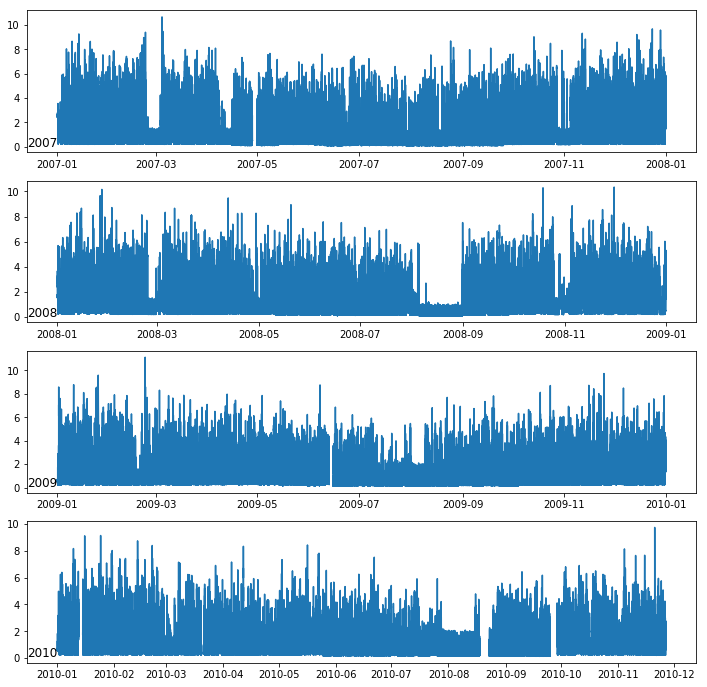

In [8]:
# plot active power for each year
years = ['2007', '2008', '2009', '2010']
pyplot.figure(figsize=(12, 12))
for i in range(len(years)):
	# prepare subplot
	ax = pyplot.subplot(len(years), 1, i+1)
	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = dataset[str(year)]
	# plot the active power for the year
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(str(year), y=0, loc='left')
pyplot.show()

我们可以看到一些常见的模式，例如2月至3月左右和8月至9月左右，我们看到消费量显着下降。
可能是因为家庭旅游出行等原因导致。

我们可以继续放大功耗，并查看2007年12个月中的每个月的有功功率。

这可能有助于弄清整个月的总体结构，例如每日和每周的模式。

下面列出了完整的示例。

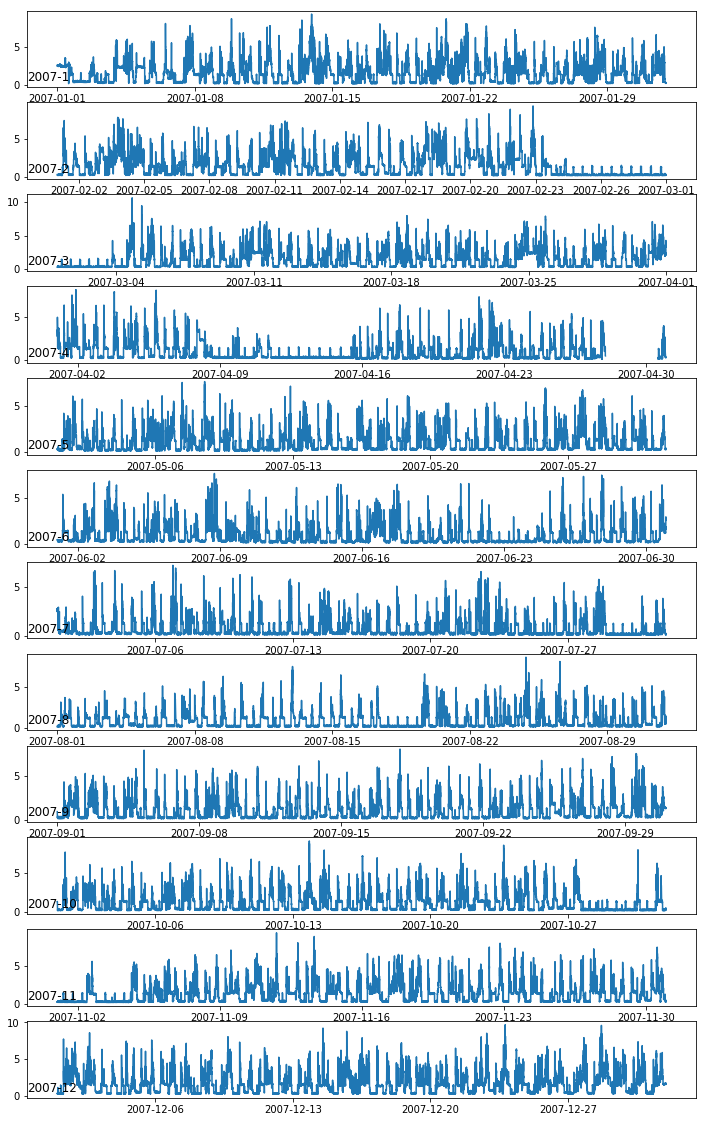

In [9]:
# monthly line plots
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
months = [x for x in range(1, 13)]
pyplot.figure(figsize=(12, 20))
for i in range(len(months)):
	# prepare subplot
	ax = pyplot.subplot(len(months), 1, i+1)
	# determine the month to plot
	month = '2007-' + str(months[i])
	# get all observations for the month
	result = dataset[month]
	# plot the active power for the month
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(month, y=0, loc='left')
pyplot.show()

我们可以看到有几天的时间消耗很少，例如八月和四月。这些可能代表休假期间的房屋空置和功耗最小。

最后，我们可以再放大一个级别，并仔细查看每天的功耗。

我们希望每天都有某种消费模式，一周之内的日子可能会有差异。

下面列出了完整的示例。

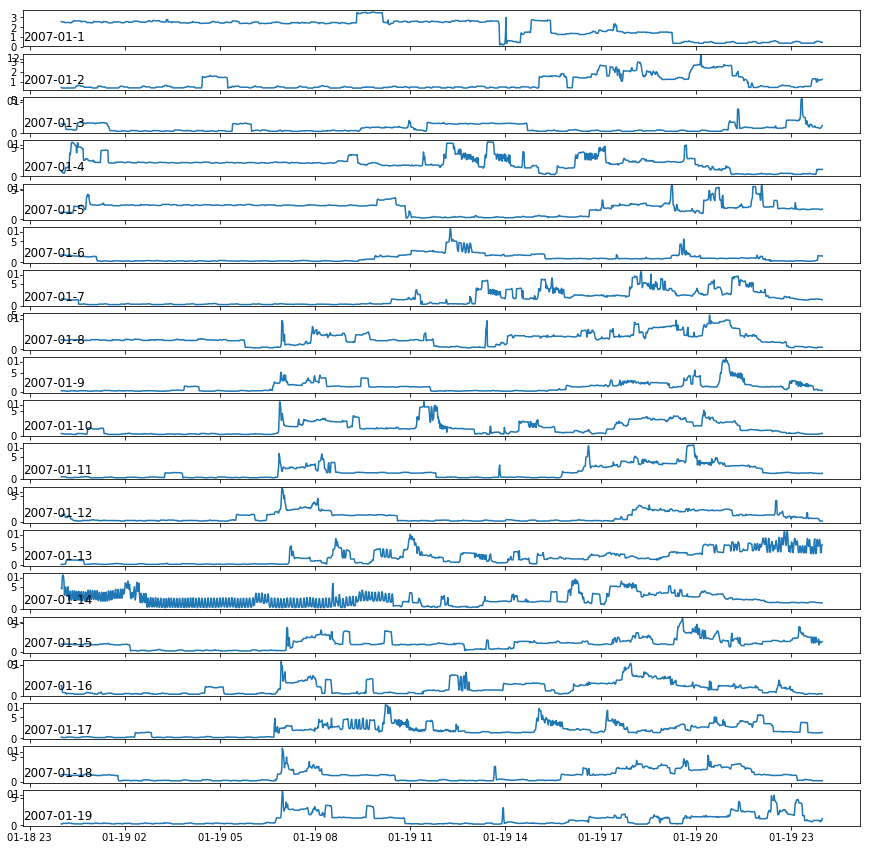

In [10]:
# daily line plots
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
days = [x for x in range(1, 20)]
pyplot.figure(figsize=(15, 15))
for i in range(len(days)):
	# prepare subplot
	ax = pyplot.subplot(len(days), 1, i+1)
	# determine the day to plot
	day = '2007-01-' + str(days[i])
	# get all observations for the day
	result = dataset[day]
	# plot the active power for the day
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(day, y=0, loc='left')
pyplot.show()

每天都有共同点；例如，许多天的消费从凌晨6点至7点开始。

某些日子会显示一天中的消费量下降，如果大多数人不在家里，这可能是有道理的。

我们确实看到某些日子的过夜消费量强劲，以至于北半球1月可能与所使用的供暖系统相匹配。

如预期的那样，一年中的时间，特别是季节和它带来的天气，将成为建模此数据的重要因素。

### 时间序列数据分布
要考虑的另一个重要领域是变量的分布。

例如，知道观测值的分布是高斯分布还是其他分布可能会很有趣。

我们可以通过检查直方图来调查数据的分布。

我们可以通过为时间序列中的每个变量创建直方图来开始。

下面列出了完整的示例。

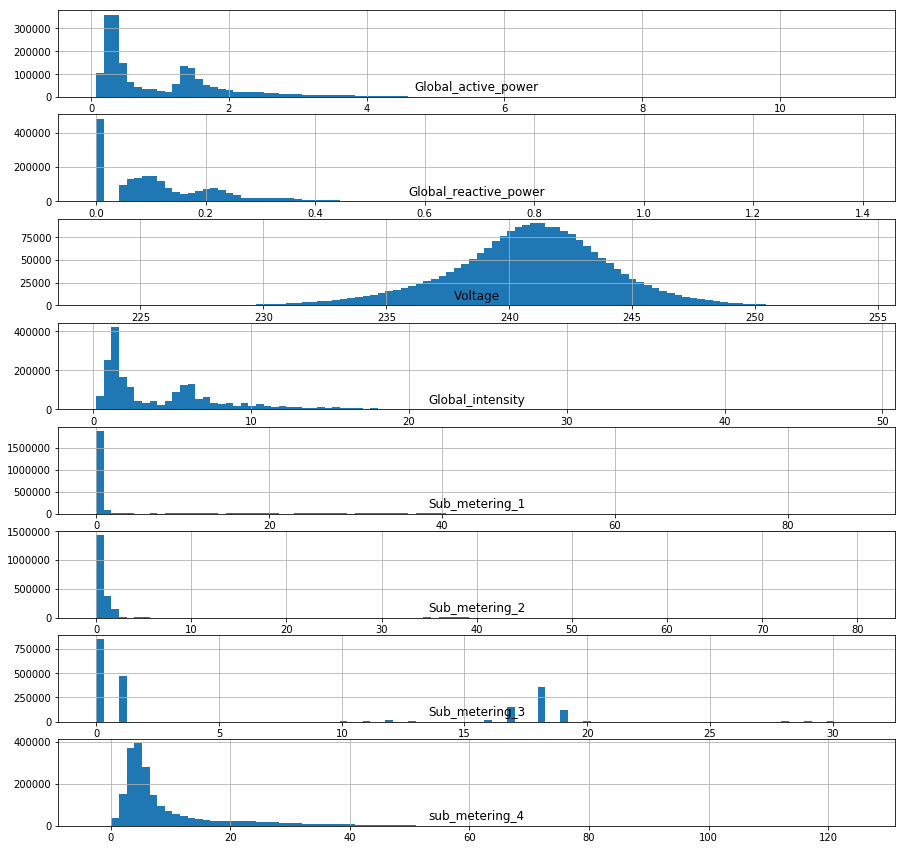

In [5]:
# histogram plots
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# histogram plot for each variable
pyplot.figure(figsize=(15, 15))
for i in range(len(dataset.columns)):
	pyplot.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	dataset[name].hist(bins=100)
	pyplot.title(name, y=0)
pyplot.show()

我们可以看到，有功和无功功率，强度以及次计量功率都向较小的瓦特小时或千瓦值倾斜分布。

我们还可以看到，电压数据的分布是高斯分布的。

In [ ]:
# Using only python package
import csv
with open('../input/household_power_consumption.txt', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        print (row)
csvfile.close()